In [1]:
import numpy as np

In [2]:
import pandas as pd

In [8]:
import pandas as pd
df = pd.read_csv('spam1.csv', encoding='latin1')


In [9]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

# Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [13]:
df

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [19]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [21]:
l = LabelEncoder()
df.target = l.fit_transform(df['target'])

In [22]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [23]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
df.duplicated().sum()

403

In [29]:
df.drop_duplicates(keep='first',inplace=True)

In [30]:
df.duplicated().sum()

0

# EDA

In [31]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [32]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x26e39f9e0e0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

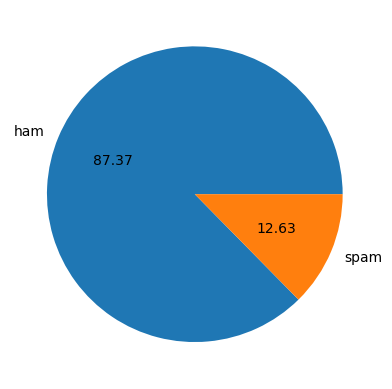

In [34]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [35]:
import nltk

In [36]:
df['no_of_alphabtes'] = df['text'].apply(len)

In [46]:
df['no_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [47]:
df['no_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [50]:
df

target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      no_of_alphabtes  no_of_words  no_of_sentences  
0                 111           24                2  
1                  29            8                2  
2                 155           37                2  
3                  49           13                1  
4                  61           15                1  
...               ...          ...              ...  
5567              161           35                4  
5568               37            9                1  
5569               57           15                2  
5570              125           27                1  
5571               26            7                2  

[5169 rows x 5 columns]

In [51]:
df[['no_of_alphabtes','no_of_words','no_of_sentences']].describe()

no_of_alphabtes  no_of_words  no_of_sentences
count      5169.000000  5169.000000      5169.000000
mean         78.977945    18.453279         1.947185
std          58.236293    13.324793         1.362406
min           2.000000     1.000000         1.000000
25%          36.000000     9.000000         1.000000
50%          60.000000    15.000000         1.000000
75%         117.000000    26.000000         2.000000
max         910.000000   220.000000        28.000000

In [41]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Srimanth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [54]:
df[df['target']==0][['no_of_alphabtes','no_of_words','no_of_sentences']].describe()

no_of_alphabtes  no_of_words  no_of_sentences
count      4516.000000  4516.000000      4516.000000
mean         70.459256    17.120903         1.799601
std          56.358207    13.493725         1.278465
min           2.000000     1.000000         1.000000
25%          34.000000     8.000000         1.000000
50%          52.000000    13.000000         1.000000
75%          90.000000    22.000000         2.000000
max         910.000000   220.000000        28.000000

In [55]:
df[df['target']==1][['no_of_alphabtes','no_of_words','no_of_sentences']].describe()

no_of_alphabtes  no_of_words  no_of_sentences
count       653.000000   653.000000       653.000000
mean        137.891271    27.667688         2.967841
std          30.137753     7.008418         1.483201
min          13.000000     2.000000         1.000000
25%         132.000000    25.000000         2.000000
50%         149.000000    29.000000         3.000000
75%         157.000000    32.000000         4.000000
max         224.000000    46.000000         8.000000

In [56]:
import seaborn as sns

<Axes: xlabel='no_of_alphabtes', ylabel='Count'>

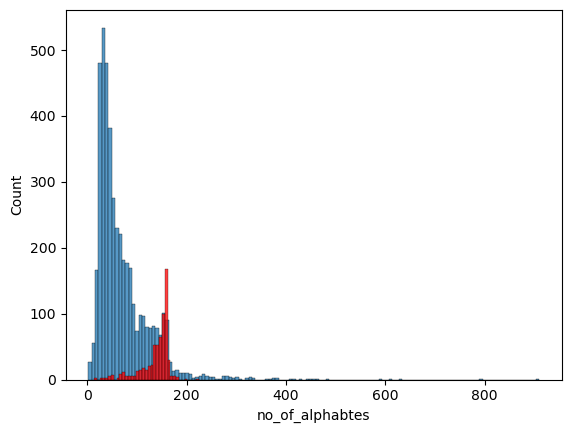

In [61]:
sns.histplot(df[df['target']==0]['no_of_alphabtes'])
sns.histplot(df[df['target']==1]['no_of_alphabtes'],color='red')

<Axes: xlabel='no_of_words', ylabel='Count'>

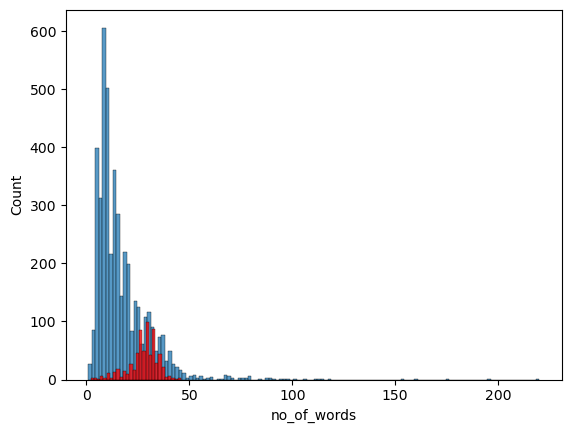

In [62]:
sns.histplot(df[df['target']==0]['no_of_words'])
sns.histplot(df[df['target']==1]['no_of_words'],color='red')

<Axes: xlabel='no_of_sentences', ylabel='Count'>

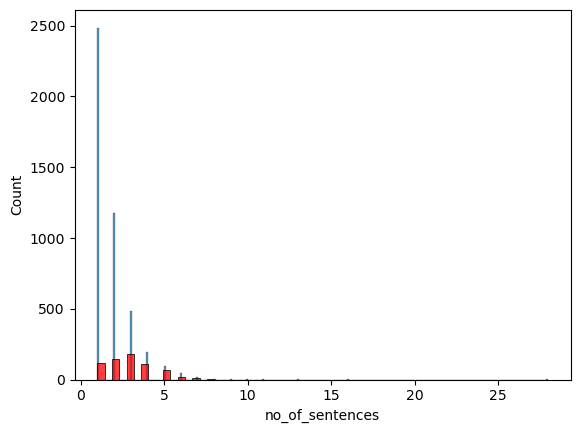

In [63]:
sns.histplot(df[df['target']==0]['no_of_sentences'])
sns.histplot(df[df['target']==1]['no_of_sentences'],color='red')

In [64]:
df.corr()

C:\Users\Srimanth\AppData\Local\Temp\ipykernel_25824\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


target  no_of_alphabtes  no_of_words  no_of_sentences
target           1.000000         0.384717     0.262984         0.284901
no_of_alphabtes  0.384717         1.000000     0.965770         0.638143
no_of_words      0.262984         0.965770     1.000000         0.684541
no_of_sentences  0.284901         0.638143     0.684541         1.000000

In [65]:
#high corr betweem no_of_alphabets , no_of_words , no_of_sentences use any one of them

# DATA PREPROCESSING
### lower case
### tokenization
### removing special characters
### removing stop words and punctuation
### stemming

In [94]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if(i.isalnum()):
            y.append(i)
    from nltk.corpus import stopwords
    import string
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [96]:
transform_text("Hi # ujwal are you ????.")

'hi ujwal'

In [100]:
df['tranformed_text']=df['text'].apply(transform_text)

In [101]:
df

target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      no_of_alphabtes  no_of_words  no_of_sentences  \
0                 111           24                2   
1                  29            8                2   
2                 155           37                2   
3                  49           13                1   
4                  61           15                1   
...               ...          ...              ...   
5567              161           35                4   
5568               37            9                1   
5569               57           15                2   
5570              125           27                1   
5571               26            7                2   

                                        tranformed_text  
0     go jurong point crazi avail bugi n great world...  
1                                 ok lar joke wif u oni  
2     free entri 2 wkli comp win fa cup final tkt 21...  
3                   u dun say earli hor u c alreadi say  
4                  nah think goe usf live around though  
...                                                 ...  
5567  2nd time tri 2 contact u pound prize 2 claim e...  
5568                              b go esplanad fr home  
5569                                  piti mood suggest  
5570  guy bitch act like interest buy someth els nex...  
5571                                     rofl true name  

[5169 rows x 6 columns]

In [104]:
from wordcloud import WordCloud

In [106]:
wc = WordCloud(background_color='white')

In [115]:
ham_wc = wc.generate(df[df['target']==0]['tranformed_text'].str.cat(sep = " "))

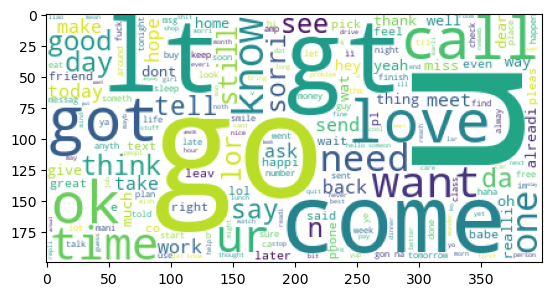

In [116]:
plt.imshow(ham_wc)

In [113]:
spam_wc = wc.generate(df[df['target']==1]['tranformed_text'].str.cat(sep = " "))

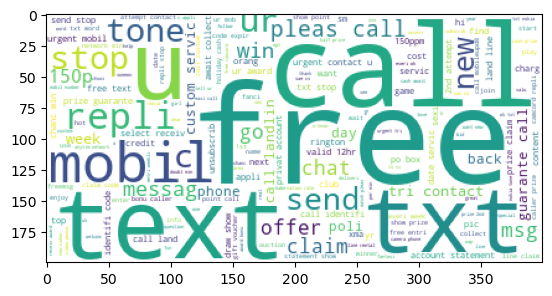

In [114]:
plt.imshow(spam_wc)

In [121]:
spam_corpus=[]

In [122]:
for msg in df[df['target']==1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

0    1
0      call  320
1      free  191
2         2  155
3       txt  141
4      text  122
5         u  119
6        ur  119
7     mobil  114
8      stop  104
9     repli  103
10    claim   98
11        4   97
12    prize   82
13      get   74
14      new   64
15   servic   64
16     tone   63
17     send   60
18   urgent   57
19    nokia   57
20  contact   56
21    award   55
22    phone   52
23     cash   51
24    pleas   51
25     week   49
26      win   48
27        c   45
28  collect   45
29      min   45

In [127]:
ham_corpus=[]
for msg in df[df['target']==0]['tranformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

0    1
0       u  883
1      go  404
2     get  349
3      gt  288
4      lt  287
5       2  284
6    come  275
7     got  236
8    know  236
9    like  234
10   call  233
11   time  219
12     ok  217
13   love  216
14   good  213
15   want  208
16     ur  197
17    day  190
18   need  170
19    one  165
20    lor  159
21      4  156
22   home  152
23  think  149
24    see  147
25   take  143
26  still  143
27     da  138
28   tell  133
29   make  129

# Model Building

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

In [130]:
cv = CountVectorizer()

In [132]:
X = cv.fit_transform(df['tranformed_text']).toarray()

In [134]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [133]:
y = df['target'].values

In [135]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [138]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [139]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [143]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [144]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [145]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [152]:
tfidf = TfidfVectorizer(max_features=3000)

In [156]:
X1 = tfidf.fit_transform(df['tranformed_text']).toarray()
y1 = df['target'].values
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=2)
gnb.fit(X1_train,y1_train)
y_pred1 = gnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
mnb.fit(X1_train,y1_train)
y_pred1 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
bnb.fit(X1_train,y1_train)
y_pred1 = bnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932
0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [151]:
#go with multinomialNB using tfidf 

In [155]:
X1 = tfidf.fit_transform(df['tranformed_text']).toarray()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
y1 = df['target'].values
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=2)
gnb.fit(X1_train,y1_train)
y_pred1 = gnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
mnb.fit(X1_train,y1_train)
y_pred1 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))
bnb.fit(X1_train,y1_train)
y_pred1 = bnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))
print(confusion_matrix(y1_test,y_pred1))
print(precision_score(y1_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128
0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461
0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [157]:
#no need to use scaling

In [158]:
#try many models and use voting_classifer and stacking
#but not getting models

In [159]:
#so we take multinomialNB

In [161]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model_sms.pkl','wb'))